In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

X_train here is a dataset of 60k images, each image is denoted by a 28*28 pixel numpy array

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

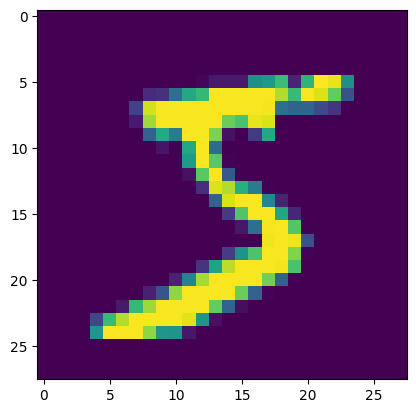

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Before importing it into Neural network we will normalize the values in [0,1] scale

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Now lets build our model

Note that since image input is 28*28 we will need to flatten it to (1,784) since Neural Network can also take 1D input

In [26]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #firstly flatten the input to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/Users/shivangsingh/Desktop/Shivang/Shivang_Codes/CampusX/Deep Learning Series/venvDL/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='Adam', metrics=['accuracy'])

In [29]:
train_history = model.fit(X_train, y_train, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8614 - loss: 0.4751 - val_accuracy: 0.9600 - val_loss: 0.1364
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9644 - loss: 0.1199 - val_accuracy: 0.9694 - val_loss: 0.1014
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9764 - loss: 0.0744 - val_accuracy: 0.9697 - val_loss: 0.1063
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9692 - val_loss: 0.1055
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.9863 - loss: 0.0425 - val_accuracy: 0.9728 - val_loss: 0.1024
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9729 - val_loss: 0.1076
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9712 - val_loss: 0.1077
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9926 -

In [32]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


In [33]:
y_prob

array([[4.42317329e-08, 2.21798047e-09, 4.98174657e-08, ...,
        9.99991655e-01, 1.07513820e-09, 6.71847738e-06],
       [9.40387823e-17, 4.68702988e-09, 1.00000000e+00, ...,
        9.21574049e-15, 1.66940228e-09, 4.79731915e-24],
       [2.47655874e-09, 9.98809397e-01, 1.17677046e-04, ...,
        2.88767100e-04, 7.56762805e-04, 4.56158524e-08],
       ...,
       [1.29650531e-18, 1.18112985e-11, 1.83875922e-18, ...,
        3.32793688e-11, 1.01935127e-12, 7.04997163e-08],
       [5.75452802e-18, 2.01091180e-17, 1.57176672e-18, ...,
        1.38800316e-14, 4.18715658e-08, 3.24412350e-12],
       [3.15847202e-13, 3.42192129e-14, 3.76489123e-13, ...,
        2.38615680e-19, 1.01907788e-11, 6.64719863e-15]], dtype=float32)

y_prob basically denotes probabilities of each class for each input.

eg :  y_prob[0] is for first image and it contains 10 values which will contain probabilities of 10 classes

now what we need is the highest probability class for each image

In [34]:
y_pred = y_prob.argmax(axis=1)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9772

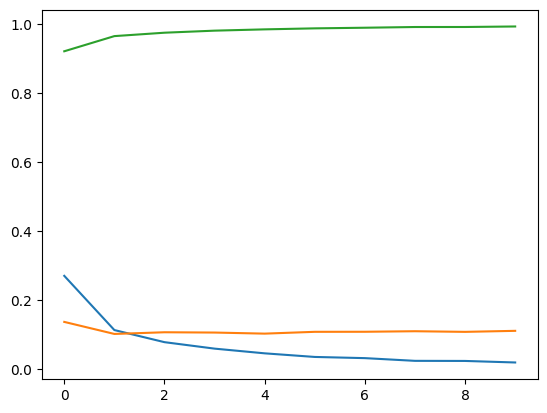

In [41]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["accuracy"])

Lets check our predictions now

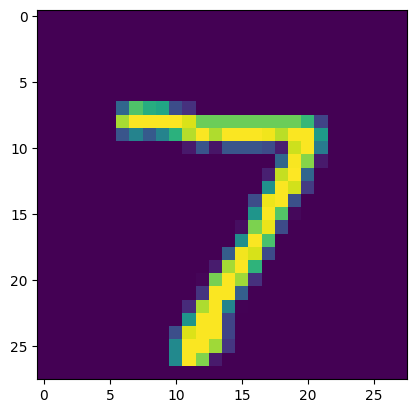

In [42]:
plt.imshow(X_test[0])

In [44]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([7])

Since our accuracy is 97% so most of our most predictions will come out to be correct.